In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#1) Загрузим файл HR.csv в pandas dataframe
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# 2) рассчитаем базовые статистики для количественных данных
# можно заметить, что средние значения и медианы достаточно близки - скорее всего распределения значений не скошенные
# отрицательных значений нет, значений, сильно отличающихся от квартилей, нет

df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [7]:
# для булевых данных рассчитаем доли
# т.е. чащще всего с сотрудниками не случались несчастные случаи на рабочем месте (всего 14% несчастных случаев),
# Увольнений всего 24%, а повышали за последние пять лет - 2% сотрудников

print('Доля несчастных случаев: %.2f' %df['Work_accident'].mean())
print('Доля увольнений: %.2f' %df['left'].mean())
print('Доля повышений: %.2f' %df['promotion_last_5years'].mean())

Доля несчастных случаев: 0.14
Доля увольнений: 0.24
Доля повышений: 0.02


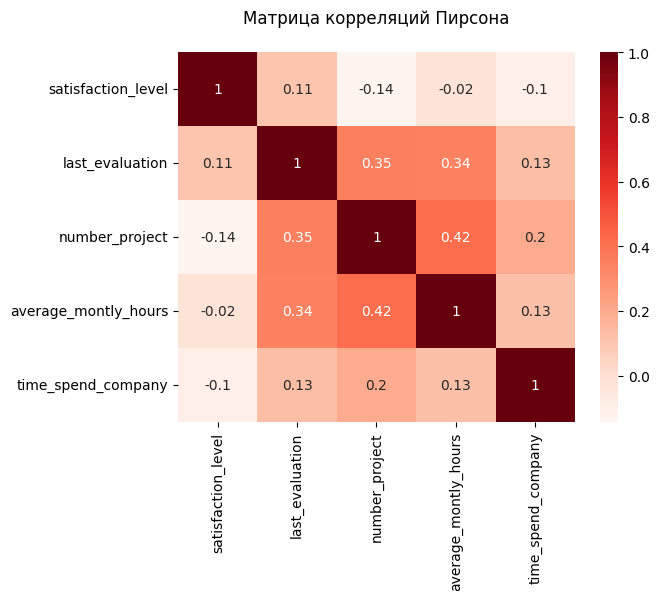

In [8]:
''' 3) Построим матрицу корреляций по количественным признакам и построим тепловую карту по ней
    Две самые скоррелированные переменные: количество проектов и среднее количество часов на рабочем месте в месяц (0.42 - прямая средняя связь)
    Две наименее скоррелированные переменные: уровень удовлетворенности работой и среднее количество часов на рабочем месте в месяц (-0.02)
'''

pd.set_option('display.float_format', '{:.2f}'.format)

corr_matrix_pearson = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляций Пирсона\n")
plt.show()

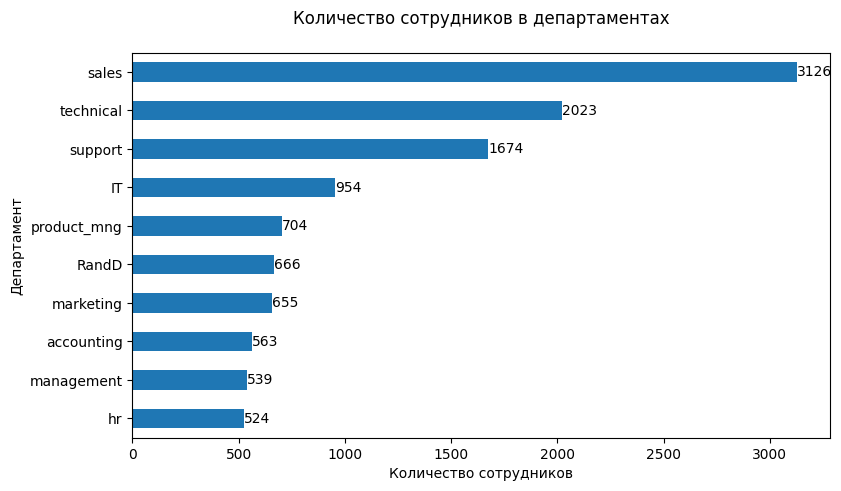

In [9]:
#  4) Рассчитаем сколько сотрудников работает в каждом департаменте.

departments = df[df['left'] == 0]['department'].value_counts() #исключаем уволенных
ax = departments.plot(kind='barh', title='Количество сотрудников в департаментах\n',ylabel='Департамент', xlabel='Количество сотрудников', figsize=[9,5]);
ax.bar_label(ax.containers[0]);
ax.invert_yaxis();

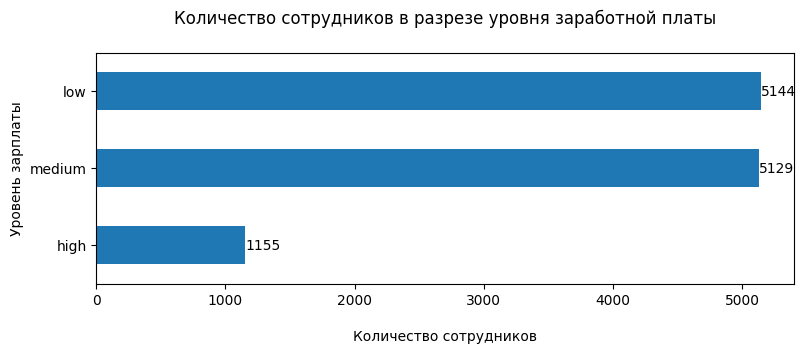

In [ ]:
# 5) Покажем распределение сотрудников по зарплатам
# больше всего сотрудников с низким и средним уровнем заработной платы
salary = df[df['left'] == 0]['salary'].value_counts()
ax = salary.plot(kind='barh', title='Количество сотрудников в разрезе уровня заработной платы\n',ylabel='Уровень зарплаты',
                 xlabel='\nКоличество сотрудников', figsize=[9,3]);
ax.bar_label(ax.containers[0]);
ax.invert_yaxis();

In [ ]:
# 6) Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности
# в management больше всего сотрудников с высоким уровнем зарплаты

pd.pivot_table(df[df['left'] == 0], values='time_spend_company', index='salary', columns='department', aggfunc='count', margins=True,
               margins_name='Total', sort = False)

department,sales,accounting,hr,technical,support,management,IT,product_mng,RandD,marketing,Total
salary,,,,,,,,,,,
low,1402,259,243,994,757,121,437,346,309,276,5144
medium,1469,235,242,853,784,194,438,296,310,308,5129
high,255,69,39,176,133,224,79,62,47,71,1155
Total,3126,563,524,2023,1674,539,954,704,666,655,11428


In [10]:
# 7) Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

# выберем необходимые данные
df_low_salary = df[(df['salary'] == 'low')&(df['left'] == 0)]['average_montly_hours']
df_high_salary = df[(df['salary'] == 'high')&(df['left'] == 0)]['average_montly_hours']

# рассчитаем среднее время на работе для каждой выборки
# средние различаются не значительно


print('Среднее время на работе сотрудников с низким окладом: %0.2f' %df_low_salary.mean())
print('Среднее время на работе сотрудников с высоким окладом: %0.2f' %df_high_salary.mean())

Среднее время на работе сотрудников с низким окладом: 198.62
Среднее время на работе сотрудников с высоким окладом: 200.35


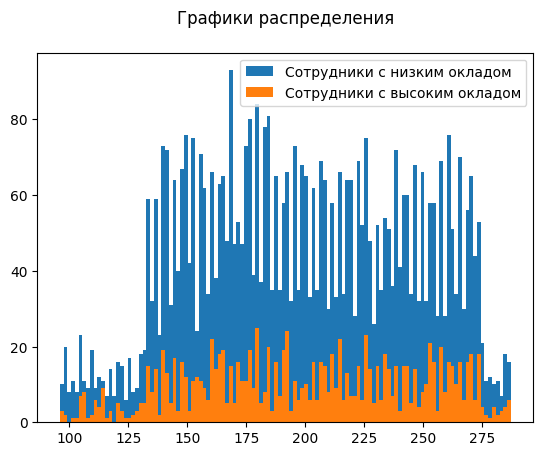

In [11]:
# Построим графики распределения для выборок
# Можно заметить, что распределения не нормальные

plt.hist(df_low_salary, bins=120,label = 'Сотрудники с низким окладом');
plt.hist(df_high_salary, bins=120,label = 'Сотрудники с высоким окладом');
plt.title("Графики распределения\n")
plt.legend();

In [12]:
# для проверки гипотезы используем непараметрический тест Манна-Уитни
# Гипотеза:
# H0: Выборки одинаковы
# H1: выборки различаются
# Тест показывает, что сотрудники с высокой и низкой заработной платой, вероятно, находятся на работе одинаковое количество времени.

stat, p = stats.mannwhitneyu(df_low_salary, df_high_salary)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика = 2902019.50000, p = 0.21906
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [13]:
''' 8) Рассчитаем следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
        ● Доля сотрудников с повышением за последние 5 лет
        ● Средняя степень удовлетворенности
        ● Среднее количество проектов
      Можно заметить, что у работающих сотрудников выше показатель повышения, выше степень удовлеворенности и чуть меньше среднее значение проектов,
      чем у тех, кто уволился

'''
df_worked = df[df['left'] == 0]
df_not_worked = df[df['left'] == 1]

print('Показатели среди уволившихся сотрудников:')
print('Доля сотрудников с повышением за последние 5 лет: %0.2f' %df_not_worked['promotion_last_5years'].mean())
print('Средняя степень удовлетворенности: %0.2f' %df_not_worked['satisfaction_level'].mean())
print('Среднее количество проектов: %0.2f' %df_not_worked['number_project'].mean())
print('-------------------------\n')
print('Показатели среди работающих сотрудников:')
print('Доля сотрудников с повышением за последние 5 лет: %0.2f' %df_worked['promotion_last_5years'].mean())
print('Средняя степень удовлетворенности: %0.2f' %df_worked['satisfaction_level'].mean())
print('Среднее количество проектов: %0.2f' %df_worked['number_project'].mean())

Показатели среди уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.01
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86
-------------------------

Показатели среди не уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.03
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


In [19]:
''' 9) Разделим данные на тестовую и обучающую выборки
       Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
       Оценим качество модели на тестовой выборке
'''
data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_class = list(df['left'])

# разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.20, random_state=42, stratify = data_class)

lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(10)

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


In [20]:
# расчитаем показатели точности
# Несмотря на то, что показатель accuracy достаточно высокий - 77%, остальные показатели невысокие, например,  f1 - 35%
# при дисбалансе классов (а уволившихся сотрудников гораздо меньше, чем оставшихся), показатель f1 более релевантен для оценки точности
# Модель лучше определяет сотрудников, которые остаются (превалирующий класс), чем тех, кто уволился.

y_pred = lda.predict(X_test)

print('Метрики классификации:')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('\tF1: {:.2f}'.format(f1_score(y_test, y_pred)))


Метрики классификации:
	Accuracy: 0.77
	Precision: 0.52
	Recall: 0.26
	F1: 0.35


In [35]:
# можно заметить, что у модели больше ошибка, когда сотрудник уволился, а модель определяет его как оставшегося.
# что и показывает метрика recall - 26%

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2111,  175],
       [ 525,  189]])